In [154]:
import numpy as np
import torch

# create dummy data for training
x_train = torch.Tensor([[-0.10, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1]])
y_train = torch.sigmoid(x_train)


In [155]:
y_train

tensor([[0.4750, 0.2891, 0.3100, 0.3318, 0.3543, 0.3775, 0.4013, 0.4256, 0.4502,
         0.4750, 0.5000, 0.5250, 0.5744, 0.5987, 0.6225, 0.6457, 0.6682, 0.7109,
         0.7311]])

In [156]:
import torch

data_federation = [[x_train, y_train], [x_train, y_train]]

in_layer = 1
out_layer = 1
optimizer = "SGD"
criterion = "MSELoss"
starting_model = torch.rand(in_layer, out_layer)
epochs = 100
learn_rate = 0.01

In [157]:
from sail_safe_functions.machine_learning.models.LogisticRegression import LogisticRegression


model = LogisticRegression(in_layer, out_layer)

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)

In [158]:
from torch.autograd import Variable

for epoch in range(epochs):

    inputs = Variable(x_train)
    labels = Variable(y_train)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x19 and 1x1)

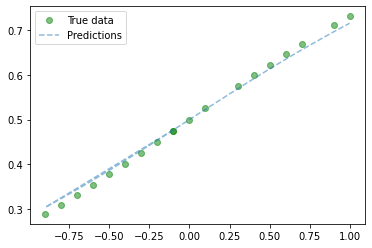

In [ ]:
import matplotlib.pyplot as plt

predicted = model(x_train).data.numpy()
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()